# Import Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf

In [2]:
model_df = pd.read_csv(r"C:\Users\josia\Desktop\Deep Learning Capstone\preprocessing_file.csv")

# Modeling

In [3]:
model_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,16884.92400,0,1,0,0,1
1,-1.511647,0.509422,-0.079442,1725.55230,1,0,0,1,0
2,-0.799350,0.383155,1.580143,4449.46200,1,0,0,1,0
3,-0.443201,-1.305052,-0.909234,21984.47061,1,0,1,0,0
4,-0.514431,-0.292456,-0.909234,3866.85520,1,0,1,0,0


# Baseline Regression Model

In [4]:
rf_df = model_df.copy()

charges_scaler = StandardScaler()
rf_df['charges'] = charges_scaler.fit_transform(rf_df[['charges']])

X = rf_df.drop('charges', axis=1)
y = rf_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

y_test_original = charges_scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = charges_scaler.inverse_transform(y_pred.reshape(-1, 1))

mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (Original Scale): {mae_original}')
print(f'Mean Squared Error (Original Scale): {mse_original}')
print(f'RMSE (Original Scale): {rmse_original}')
print(f'R-squared: {r2_original}')

Mean Absolute Error (Original Scale): 2934.1812765776117
Mean Squared Error (Original Scale): 27011192.016204637
RMSE (Original Scale): 5197.229263386852
R-squared: 0.8004529221565553


# Neural Network #1

In [5]:
nn1_df = model_df.copy()

charges_scaler = StandardScaler()
nn1_df['charges'] = charges_scaler.fit_transform(nn1_df[['charges']])

X = nn1_df.drop('charges', axis=1) 
y = nn1_df['charges']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(32, activation='relu'))  
model.add(Dense(16, activation='relu')) 
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping_monitor])

y_pred = model.predict(X_test)

y_test_original = charges_scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = charges_scaler.inverse_transform(y_pred)

mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (Original Scale): {mae_original:.4f}')
print(f'Mean Squared Error (Original Scale): {mse_original:.4f}')
print(f'RMSE (Original Scale): {rmse_original:.4f}')
print(f'R-squared: {r2_original:.4f}')


C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Absolute Error (Original Scale): 3329.6786
Mean Squared Error (Original Scale): 27480080.5654
RMSE (Original Scale): 5242.1447
R-squared: 0.7970


# Neural Network #2

In [6]:
nn2_df = model_df.copy()

charges_scaler = StandardScaler()
nn2_df['charges'] = charges_scaler.fit_transform(nn2_df[['charges']])

X = nn2_df.drop('charges', axis=1)
y = nn2_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(50, activation='relu'))  
model.add(Dense(25, activation='relu')) 
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping_monitor])

y_pred = model.predict(X_test)

y_test_original = charges_scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = charges_scaler.inverse_transform(y_pred)

mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (Original Scale): {mae_original:.4f}')
print(f'Mean Squared Error (Original Scale): {mse_original:.4f}')
print(f'RMSE (Original Scale): {rmse_original:.4f}')
print(f'R^2 Score: {r2_original:.4f}')

C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Mean Absolute Error (Original Scale): 3384.3763
Mean Squared Error (Original Scale): 28550924.0789
RMSE (Original Scale): 5343.3065
R^2 Score: 0.7891


The larger number of nodes improved network performance

# Neural Network #3

In [7]:
nn3_df = model_df.copy()

charges_scaler = StandardScaler()
nn3_df['charges'] = charges_scaler.fit_transform(nn3_df[['charges']])

X = nn3_df.drop('charges', axis=1)
y = nn3_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(X_train.shape[1],)))  
model.add(Dense(100, activation='relu')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(1)) 

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping_monitor])

y_pred = model.predict(X_test)

y_test_original = charges_scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = charges_scaler.inverse_transform(y_pred)

mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (Original Scale): {mae_original:.4f}')
print(f'Mean Squared Error (Original Scale): {mse_original:.4f}')
print(f'RMSE (Original Scale): {rmse_original:.4f}')
print(f'R^2 Score: {r2_original:.4f}')

C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Absolute Error (Original Scale): 3055.1740
Mean Squared Error (Original Scale): 28234432.4427
RMSE (Original Scale): 5313.6082
R^2 Score: 0.7914


# Model Comparisons

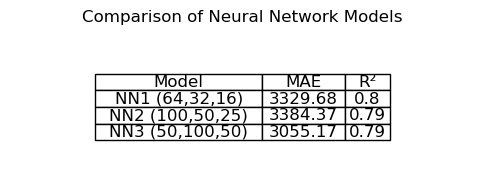

In [26]:
# Model configurations and results
data = {
    'Model': ['NN1 (64,32,16)', 'NN2 (100,50,25)', 'NN3 (50,100,50)'],
    'MAE': [3329.68, 3384.37, 3055.17],
    'R²': [0.80, 0.79, 0.79]
}

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

# Combine the keys and values for the table
cell_text = []
for i in range(len(data['Model'])):
    cell_text.append([data['Model'][i], data['MAE'][i], data['R²'][i]])

# Display the table
table = ax.table(cellText=cell_text, colLabels=list(data.keys()), cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=[0, 1, 2])

plt.title("Comparison of Neural Network Models")
plt.show()


# Neural Network Best Parameter Search

In [8]:
# Imports
from keras_tuner import Hyperband

# 1. Define the Hyperparameter Tuning Model
def build_model(hp):
    model = Sequential()
    
   
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=4), 
                    activation='relu', input_shape=(X_train.shape[1],)))
    
    
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=4), activation='relu'))
    
  
    model.add(Dense(units=hp.Int('units_3', min_value=16, max_value=64, step=2), activation='relu'))
    

    model.add(Dense(1))
    

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    return model

# 2. Initialize the Hyperband Tuner
tuner = Hyperband(
    build_model,
    objective='val_mean_absolute_error',
    max_epochs=50,
    factor=3,
    directory='my_dir',
    project_name='tune_nn_2'
)

# 3. Prepare the Data

nn4_df = model_df.copy()


charges_scaler = StandardScaler()
nn4_df['charges'] = charges_scaler.fit_transform(nn4_df[['charges']])


X = nn4_df.drop('charges', axis=1)
y = nn4_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

early_stopping_monitor = EarlyStopping(patience=3)

# 4. Perform Hyperparameter Tuning
tuner.search(X_train, y_train, epochs=200, validation_split=0.2, callbacks=[early_stopping_monitor])

best_model = tuner.get_best_models(num_models=1)[0]

# 5. Make Predictions and Rescale
predictions_scaled = best_model.predict(X_test)

predictions_scaled = predictions_scaled.reshape(-1, 1)

predictions_original = charges_scaler.inverse_transform(predictions_scaled)
y_test_original = charges_scaler.inverse_transform(y_test.values.reshape(-1, 1))

# 6. Evaluate the Model
mae_original = mean_absolute_error(y_test_original, predictions_original)
mse_original = mean_squared_error(y_test_original, predictions_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, predictions_original)

print(f"Mean Absolute Error (Original Scale): {mae_original}")
print(f"Mean Squared Error (Original Scale): {mse_original}")
print(f'RMSE (Original Scale): {rmse_original:.4f}')
print(f'R^2 Score: {r2_original:.4f}')


Reloading Tuner from my_dir\tune_nn_2\tuner0.json



C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Absolute Error (Original Scale): 2861.3921774454
Mean Squared Error (Original Scale): 28946130.575242747
RMSE (Original Scale): 5380.1608
R^2 Score: 0.7862


In [9]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best number of units in first layer: {best_hps.get('units_1')}")
print(f"Best number of units in second layer: {best_hps.get('units_2')}")
print(f"Best number of units in third layer: {best_hps.get('units_3')}")

Best number of units in first layer: 72
Best number of units in second layer: 120
Best number of units in third layer: 40


In [10]:
optimizer = best_model.optimizer
print("Optimizer:", optimizer.__class__.__name__)

if hasattr(optimizer, 'learning_rate'):
    print("Learning Rate:", optimizer.learning_rate.numpy())  
else:
    print("Learning Rate is not accessible")

loss_function = best_model.loss
print("Loss Function:", loss_function)

print("Metrics:", best_model.metrics)

input_shape = best_model.input_shape
print("Input Shape:", input_shape)


if hasattr(best_model, 'history'):
    print("Training History:", best_model.history.history)


Optimizer: Adam
Learning Rate: 0.001
Loss Function: mean_squared_error
Metrics: [<Mean name=loss>, <CompileMetrics name=compile_metrics>]
Input Shape: (None, 8)
Training History: {}


# Final Model

In [17]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

nn3_df = model_df.copy()

charges_scaler = StandardScaler()
nn3_df['charges'] = charges_scaler.fit_transform(nn3_df[['charges']])

X = nn3_df.drop('charges', axis=1)
y = nn3_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model = Sequential()
model.add(Dense(72, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dense(120, activation='relu'))  
model.add(Dense(40, activation='relu'))  
model.add(Dense(1))  

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping_monitor = EarlyStopping(patience=3)

history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2, verbose=0, callbacks=[early_stopping_monitor])

y_pred = model.predict(X_test)

y_test_original = charges_scaler.inverse_transform(y_test.values.reshape(-1, 1))
y_pred_original = charges_scaler.inverse_transform(y_pred)

mae_original = mean_absolute_error(y_test_original, y_pred_original)
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f'Mean Absolute Error (Original Scale): {mae_original:.4f}')
print(f'Mean Squared Error (Original Scale): {mse_original:.4f}')
print(f'RMSE (Original Scale): {rmse_original:.4f}')
print(f'R^2 Score: {r2_original:.4f}')

C:\Users\josia\anaconda3\Desktop\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Absolute Error (Original Scale): 2808.8756
Mean Squared Error (Original Scale): 28671955.6001
RMSE (Original Scale): 5354.6200
R^2 Score: 0.7882


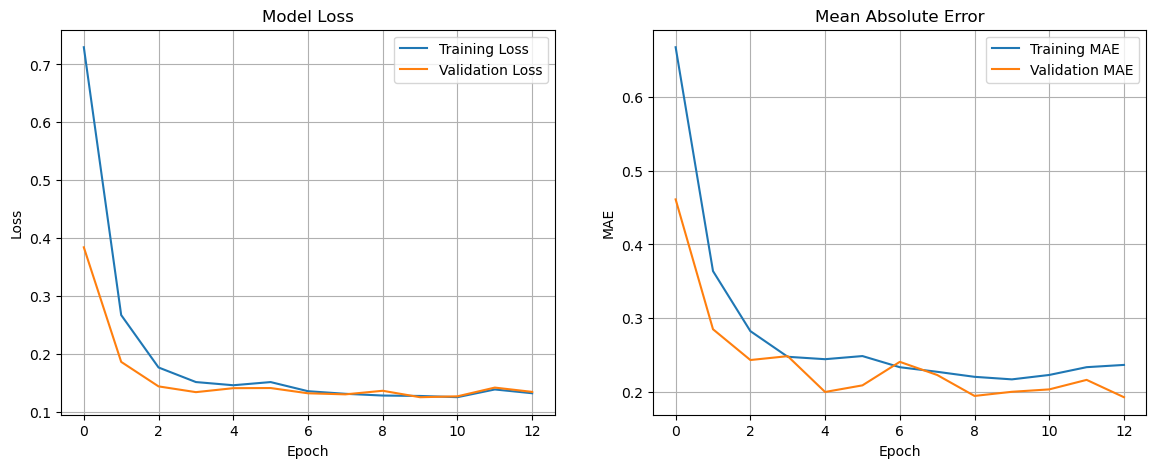

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.show()


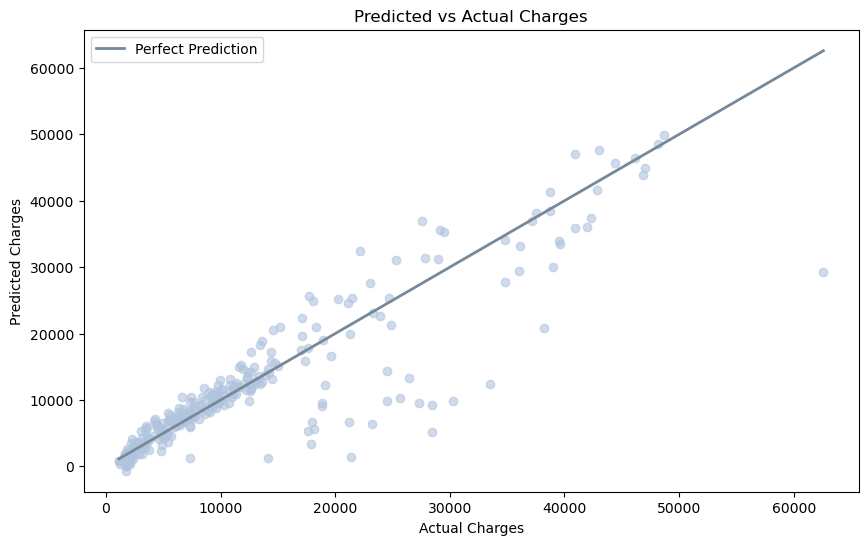

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.6, color='lightsteelblue')
plt.plot([y_test_original.min(), y_test_original.max()], 
         [y_test_original.min(), y_test_original.max()], 
         color='lightslategray', linewidth=2, label='Perfect Prediction')  
plt.title('Predicted vs Actual Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.grid(False)
plt.show()

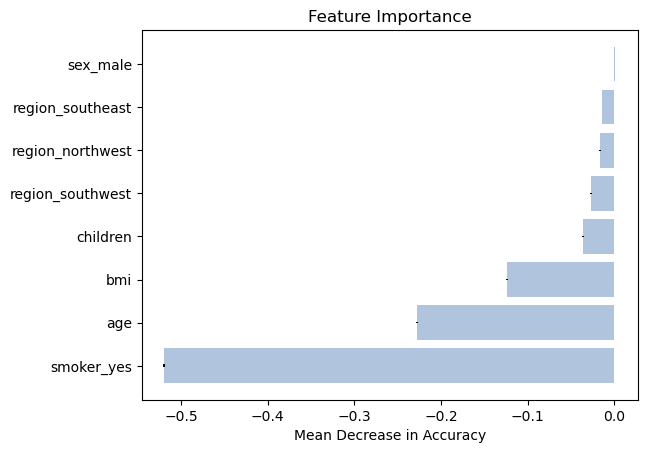

In [29]:
from sklearn.inspection import permutation_importance


def score_function(model, X, y):
    y_pred = model.predict(X, verbose=0)
    return mean_absolute_error(y, y_pred)

result = permutation_importance(
    model,
    X_test,
    y_test,
    n_repeats=30,
    random_state=0,
    scoring=score_function  
)

sorted_idx = result.importances_mean.argsort()

plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], yerr=result.importances_std[sorted_idx], color='lightsteelblue')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.title('Feature Importance')
plt.xlabel('Mean Decrease in Accuracy')
plt.show()

In [27]:
clean_df = pd.read_csv(r"C:\Users\josia\Desktop\Deep Learning Capstone\data_wrangling_cleaned_file.csv")

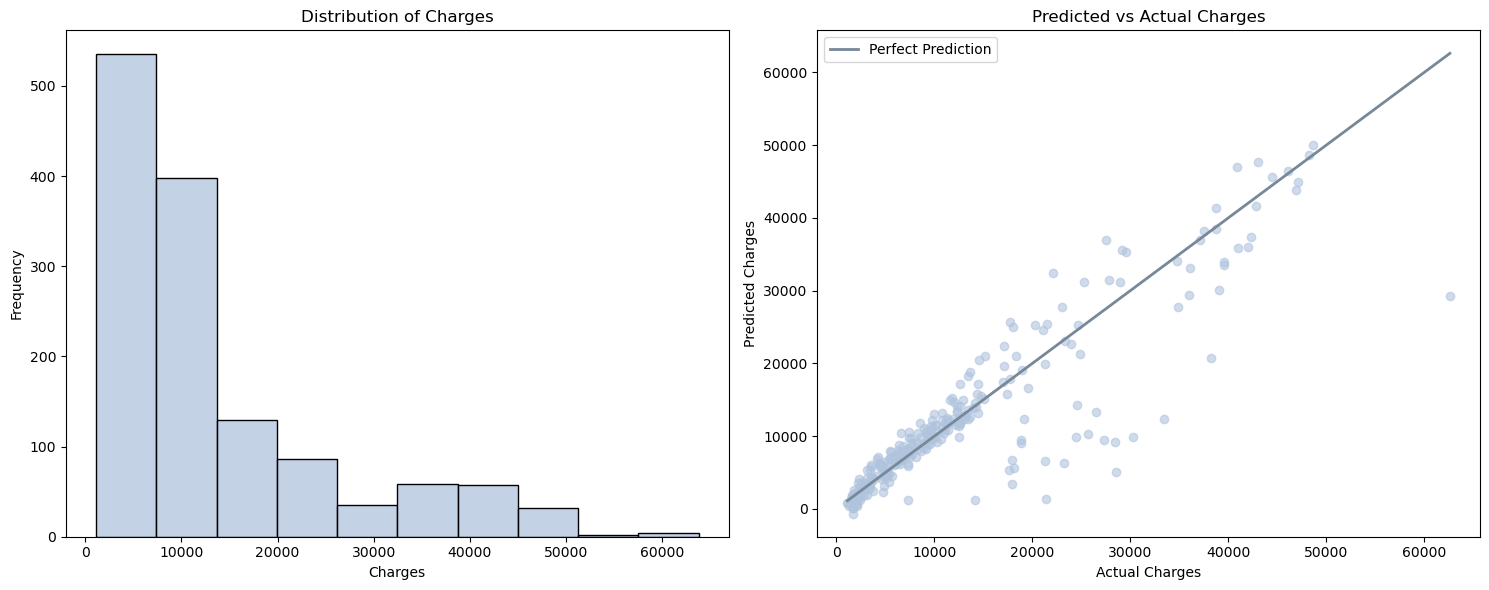

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(clean_df['charges'], bins=10, color='lightsteelblue', ax=axes[0])
axes[0].set_title('Distribution of Charges')
axes[0].set_xlabel('Charges')
axes[0].set_ylabel('Frequency')

axes[1].scatter(y_test_original, y_pred_original, alpha=0.6, color='lightsteelblue')
axes[1].plot([y_test_original.min(), y_test_original.max()], 
             [y_test_original.min(), y_test_original.max()], 
             color='lightslategray', linewidth=2, label='Perfect Prediction')
axes[1].set_title('Predicted vs Actual Charges')
axes[1].set_xlabel('Actual Charges')
axes[1].set_ylabel('Predicted Charges')
axes[1].legend()
axes[1].grid(False)

# Adjust layout
plt.tight_layout()
plt.show()
